In [1]:
import os
import json
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

from collections import defaultdict

In [2]:
anns, cats, imgs = {}, {}, {}
imgToAnns,catToImgs = defaultdict(list),defaultdict(list)
def createIndex():
    # create index
    print('creating index...')
    
    if 'annotations' in dataset:
        for ann in dataset['annotations']:
            imgToAnns[ann['image_id']].append(ann)
            anns[ann['id']] = ann

    if 'images' in dataset:
        for img in dataset['images']:
            imgs[img['id']] = img

    if 'categories' in dataset:
        for cat in dataset['categories']:
            cats[cat['id']] = cat

    if 'annotations' in dataset and 'categories' in dataset:
        for ann in dataset['annotations']:
            catToImgs[ann['category_id']].append(ann['image_id'])

    print('index created!')

In [39]:
with open('../../Downloads/mscoco/annotations/instances_train2017.json') as f:
    dataset = json.load(f)
createIndex()

creating index...
index created!


In [118]:
imgs[list(imgs.keys())[0]]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [114]:
imgToAnns[list(imgs.keys())[0]][0]

{'segmentation': [[224.24,
   297.18,
   228.29,
   297.18,
   234.91,
   298.29,
   243.0,
   297.55,
   249.25,
   296.45,
   252.19,
   294.98,
   256.61,
   292.4,
   254.4,
   264.08,
   251.83,
   262.61,
   241.53,
   260.04,
   235.27,
   259.67,
   230.49,
   259.67,
   233.44,
   255.25,
   237.48,
   250.47,
   237.85,
   243.85,
   237.11,
   240.54,
   234.17,
   242.01,
   228.65,
   249.37,
   224.24,
   255.62,
   220.93,
   262.61,
   218.36,
   267.39,
   217.62,
   268.5,
   218.72,
   295.71,
   225.34,
   297.55]],
 'area': 1481.3806499999994,
 'iscrowd': 0,
 'image_id': 397133,
 'bbox': [217.62, 240.54, 38.99, 57.75],
 'category_id': 44,
 'id': 82445}

In [99]:
bbox = imgToAnns[list(imgs.keys())[0]][0]['bbox']; bbox

[217.62, 240.54, 38.99, 57.75]

In [115]:
categ = [imgToAnns[list(imgs.keys())[0]][i]['category_id'] for i in range(19)]; categ

[44, 67, 1, 49, 51, 51, 79, 1, 47, 47, 51, 51, 56, 50, 56, 56, 79, 57, 81]

In [104]:
len(imgToAnns[list(imgs.keys())[0]])

19

In [116]:
[cats[c] for c in categ]

[{'supercategory': 'kitchen', 'id': 44, 'name': 'bottle'},
 {'supercategory': 'furniture', 'id': 67, 'name': 'dining table'},
 {'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'kitchen', 'id': 49, 'name': 'knife'},
 {'supercategory': 'kitchen', 'id': 51, 'name': 'bowl'},
 {'supercategory': 'kitchen', 'id': 51, 'name': 'bowl'},
 {'supercategory': 'appliance', 'id': 79, 'name': 'oven'},
 {'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'kitchen', 'id': 47, 'name': 'cup'},
 {'supercategory': 'kitchen', 'id': 47, 'name': 'cup'},
 {'supercategory': 'kitchen', 'id': 51, 'name': 'bowl'},
 {'supercategory': 'kitchen', 'id': 51, 'name': 'bowl'},
 {'supercategory': 'food', 'id': 56, 'name': 'broccoli'},
 {'supercategory': 'kitchen', 'id': 50, 'name': 'spoon'},
 {'supercategory': 'food', 'id': 56, 'name': 'broccoli'},
 {'supercategory': 'food', 'id': 56, 'name': 'broccoli'},
 {'supercategory': 'appliance', 'id': 79, 'name': 'oven'},
 {'supercate

In [4]:
fpath = '/home/met/ug/16144001/Downloads/mscoco/val2017/'
fname = '000000397133.jpg'
img = Image.open(fpath+fname)

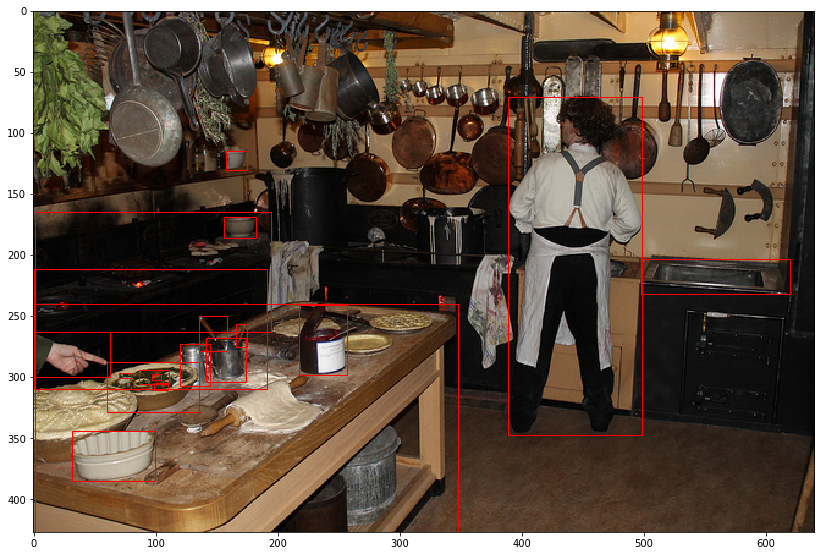

In [5]:
fig = plt.figure()
fig.set_size_inches((14,12))
ax = plt.gca()

for i in range(19):
    bbox = imgToAnns[list(imgs.keys())[0]][i]['bbox']
    rec = patches.Rectangle((bbox[:2]), bbox[2], bbox[3], fill=False, edgecolor='r')
    ax.add_patch(rec)
ax.imshow(img)

In [123]:
#find seen classes
#then find image_ids of those classes
#then take only those image_ids which are present in val2017
#take an image id
    #find its file name
    #find all of its bbox and categories
    #save a dictionary of image_names, bbox and categories
    
#take a bbox and its category    
#crop the image using bbox and find its features and word embedding and save them also save class id

dict_keys([397133, 37777, 252219, 87038, 174482, 403385, 6818, 480985, 458054, 331352, 296649, 386912, 502136, 491497, 184791, 348881, 289393, 522713, 181666, 17627, 143931, 303818, 463730, 460347, 322864, 226111, 153299, 308394, 456496, 58636, 41888, 184321, 565778, 297343, 336587, 122745, 219578, 555705, 443303, 500663, 418281, 25560, 403817, 85329, 329323, 239274, 286994, 511321, 314294, 233771, 475779, 301867, 312421, 185250, 356427, 572517, 270244, 516316, 125211, 562121, 360661, 16228, 382088, 266409, 430961, 80671, 577539, 104612, 476258, 448365, 35197, 349860, 180135, 486438, 400573, 109798, 370677, 238866, 369370, 502737, 515579, 515445, 173383, 438862, 180560, 347693, 39956, 321214, 474028, 66523, 355257, 142092, 63154, 199551, 239347, 514508, 473237, 228144, 206027, 78915, 551215, 544519, 96493, 23899, 340175, 578500, 366141, 57597, 559842, 434230, 428454, 399462, 261061, 168330, 383384, 342006, 217285, 236412, 524456, 153343, 95786, 326541, 213086, 231339, 508730, 550426, 3

In [40]:
with open('../downloads/mscoco_seen_classes.json') as f:
    seen_classes = json.load(f)

In [41]:
with open('../downloads/mscoco_unseen_classes.json') as f:
    unseen_classes = json.load(f)

In [42]:
fpath = '/home/met/ug/16144001/Downloads/mscoco/val2017/'

In [13]:
val_img_names = os.listdir(fpath)

In [31]:
img_imgid = {}
for i in list(imgs.keys()):
    nm = imgs[i]['file_name']
    if nm in val_img_names:
        img_imgid[nm] = i

In [32]:
len(val_img_names) == len(img_imgid.keys())

True

In [21]:
img_box_cat = []
for img_name, img_id in img_imgid.items():
    img = Image.open(fpath+img_name)
    values = []
    for item in imgToAnns[img_id]:
        bbox = item['bbox']
        cat_name = cats[item['category_id']]['name']
        if cat_name in seen_classes:
            values.append({'bbox:': bbox,
                          'category': cat_name})
    img_box_cat.append({img_name: values})

In [24]:
with open('train_seen_img_box_cat.json', 'w') as f:
    json.dump(img_box_cat, f)

In [42]:
fpath = '/home/met/ug/16144001/Downloads/mscoco/train2017/'

In [43]:
train_img_names = os.listdir(fpath)

In [44]:
img_imgid = {}
for i in list(imgs.keys()):
    nm = imgs[i]['file_name']
    if nm in train_img_names:
        img_imgid[nm] = i

In [45]:
len(train_img_names) == len(img_imgid.keys())

True

In [51]:
%time
img_box_cat = []
for img_name, img_id in img_imgid.items():
    img = Image.open(fpath+img_name)
    values = []
    for item in imgToAnns[img_id]:
        bbox = item['bbox']
        cat_name = cats[item['category_id']]['name']
        if cat_name in seen_classes:
            values.append({'bbox:': bbox,
                          'category': cat_name})
    img_box_cat.append({img_name: values})

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 34.8 µs


In [55]:
%time len(img_box_cat)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 33.4 µs


118287

In [53]:
with open('train_seen_img_box_cat.json', 'w') as f:
    json.dump(img_box_cat, f)

In [150]:
cats[44]['name']

'bottle'